https://colab.research.google.com/drive/1_7FRKW6hiOpG80rPkes0ScZ-Ye_ldgXq?usp=share_link

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torch.utils.data import TensorDataset, DataLoader
from torch import nn, optim
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.MNIST('MNIST', download=True, train=True, transform=transform)
valset = datasets.MNIST('MNIST', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


In [ ]:
digits = datasets.load_digits()

#Plot image of dataset
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(digits.images[index], cmap='gray_r')

#Train-test set
X_train, X_test, y_train, y_test = train_test_split(digits.images, digits.target, train_size=0.8)

# transform to torch tensor
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

Tr_set = TensorDataset(X_train,y_train) # create your datset
Tr_dataloader = DataLoader(Tr_set,batch_size=64, shuffle=True) # create your dataloader
Ts_set = TensorDataset(X_test,y_test)
Ts_dataloader = DataLoader(Ts_set,batch_size=64, shuffle=True)

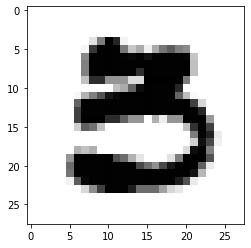

In [ ]:
#Extract
dataiter = iter(trainloader)
images, labels = next(dataiter)

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

In [ ]:
#Hidden node size
# 1st hidden layer has 64 neural node
# 2nd hidden layer has 32 neural node
hidden_size = [64,32]
output_size = 10 #Number 0-9

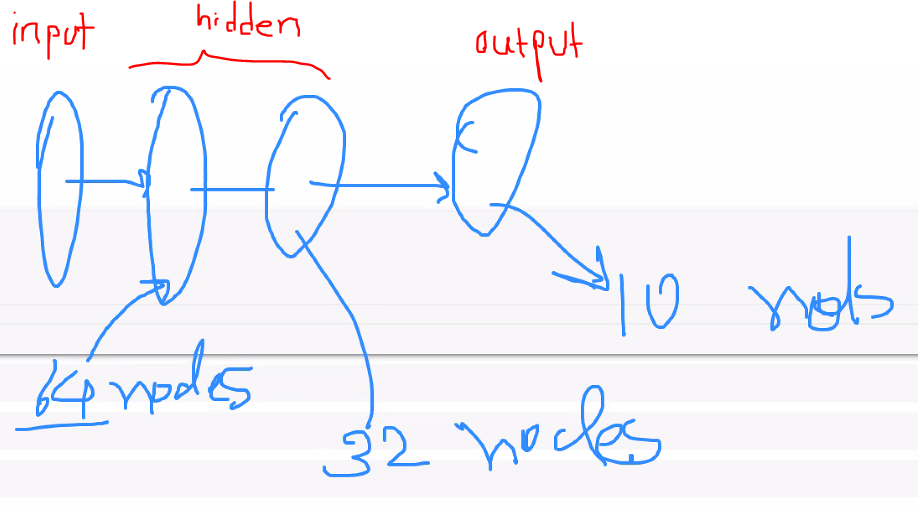

In [ ]:
#Creating model
#ReLu = activation function
model = nn.Sequential(
    nn.LazyLinear(hidden_size[0]),
    nn.ReLU(), #ReLu = activation function , RelU no ReLu 555
    nn.LazyLinear(hidden_size[1]),
    nn.ReLU(),
    nn.LazyLinear(output_size),
    nn.Softmax(dim=1), #output show 1 column.
)

print(model)

In [ ]:
class Net(nn.Module):
    def __init__(self,input_size,hidden_size1,hidden_size2,output_size):
        super().__init__()
        self.Layer1 = nn.Sequential(
            nn.Linear(input_size,hidden_size1),
            nn.ReLU(),
        )
        self.Layer2 = nn.Sequential(
            nn.LazyLinear(hidden_size2),
            nn.ReLU(),
        )
        self.Layer3 = nn.Sequential(
            nn.LazyLinear(output_size),
            nn.Softmax(dim=1),
        )
    def forward(self, x):
        x = self.Layer1(x)
        x = self.Layer2(x)
        x = self.Layer3(x)
        return x

model = Net(28*28, 64, 62, 10)
print(model)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
epochs = 10
for e in range(epochs):
    total_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1)

        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        loss.backward()

        optimizer.step()
        total_loss += loss.item()
    print("Epoch {} - Training loss: {}".format(e, total_loss/len(trainloader)))


In [ ]:
hidden_size = [64, 32]
output_size = 10

model = nn.Sequential(
    nn.Linear(28*28,hidden_size[0]),
    nn.ReLU(),
    nn.LazyLinear(hidden_size[1]),
    nn.ReLU(),
    nn.LazyLinear(output_size),
    nn.Softmax(dim=1),
)

print(model)

from torchsummary import summary
summary(model,input_size=(28*28,))


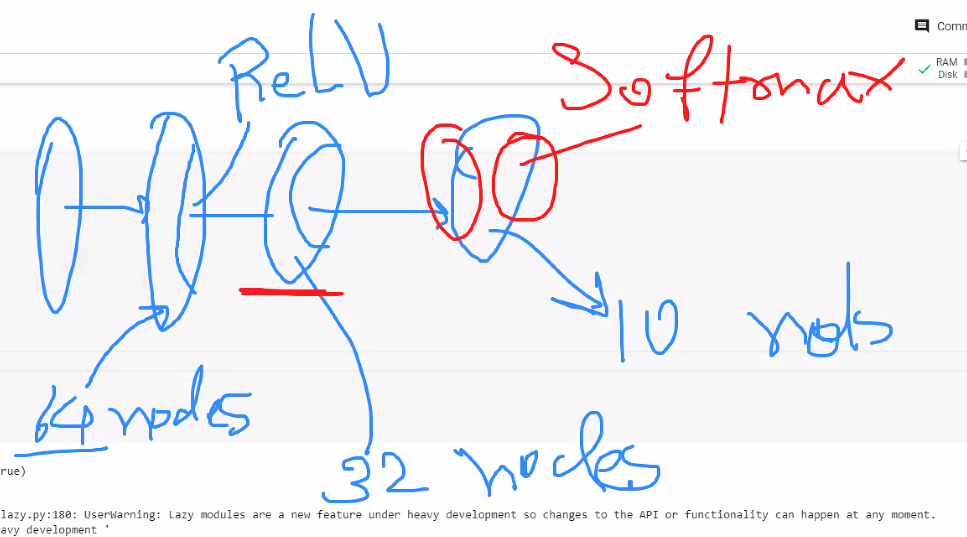

In [ ]:
import torch
print(torch.__version__)

In [ ]:
correct_count = 0
count = 0
for images, labels in valloader:
    for i in range(len(labels)):
        image = images[i].view(1,28*28)
        with torch.no_grad():
            y_output = model(image)

        prob = list(y_output.numpy()[0])
        pred_label = prob.index(max(prob))
        true_label = labels.numpy()[i]
        if true_label==pred_label:
            correct_count += 1
        count += 1

print("Accuracy = ", (correct_count/count))


In [ ]:
hidden_sizes = [64,32]
output_size = 10

model = nn.Sequential(
    nn.Conv2d(1,hidden_sizes[0],kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(3),
    nn.Conv2d(hidden_sizes[0],hidden_sizes[1],kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(3),
    nn.Flatten(),
    nn.LazyLinear(output_size),
    nn.Softmax(dim=1),
)

print(model)

from torchsummary import summary
print(images.shape[1:])
summary(model, input_size=images.shape[1:])



In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
epochs = 10
for e in range(epochs):
    total_loss = 0
    for images, labels in trainloader:
        #images = images.view(images.shape[0],-1)

        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        loss.backward()

        optimizer.step()
        total_loss += loss.item()
    print("Epoch {} - Training loss: {}".format(e, total_loss/len(trainloader)))


In [ ]:
class Net(nn.Module):
    def __init__(self,hidden_size1,hidden_size2,output_size):
        super().__init__()
        self.Layer1 = nn.Sequential(
            nn.Conv2d(1,hidden_size1,kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(3),
        )
        self.Layer2 = nn.Sequential(
            nn.Conv2d(hidden_size1,hidden_size2,kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(3),
        )
        self.Layer3 = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(output_size),
            nn.Softmax(dim=1),
        )
    def forward(self, x):
        x = self.Layer1(x)
        x = self.Layer2(x)
        x = self.Layer3(x)
        return x

model = Net(64,32,10)

from torchsummary import summary

print(images.shape[1:])
summary(model, input_size=images.shape[1:])


torch.Size([1, 28, 28])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 26, 26]             640
              ReLU-2           [-1, 64, 26, 26]               0
         MaxPool2d-3             [-1, 64, 8, 8]               0
            Conv2d-4             [-1, 32, 6, 6]          18,464
              ReLU-5             [-1, 32, 6, 6]               0
         MaxPool2d-6             [-1, 32, 2, 2]               0
           Flatten-7                  [-1, 128]               0
            Linear-8                   [-1, 10]           1,290
           Softmax-9                   [-1, 10]               0
Total params: 20,394
Trainable params: 20,394
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.71
Params size (MB): 0.08
Estimated Total Size (MB): 0.79
---------------------

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
epochs = 10
for e in range(epochs):
    total_loss = 0
    for images, labels in trainloader:
        #images = images.view(images.shape[0],-1)

        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        loss.backward()

        optimizer.step()
        total_loss += loss.item()
    print("Epoch {} - Training loss: {}".format(e, total_loss/len(trainloader)))


Epoch 0 - Training loss: 2.0824974734645916
Epoch 1 - Training loss: 1.722966154628217
Epoch 2 - Training loss: 1.6953163946361176
Epoch 3 - Training loss: 1.6849886396292175
Epoch 4 - Training loss: 1.6788348465331837
Epoch 5 - Training loss: 1.6287332770666842
Epoch 6 - Training loss: 1.5226396309541488
Epoch 7 - Training loss: 1.5032161666131985
Epoch 8 - Training loss: 1.4978838060964654
Epoch 9 - Training loss: 1.4943634037778322


In [ ]:
from sklearn import metrics

correct_count = 0
count = 0
for images, labels in valloader:
    for i in range(len(labels)):
        #image = images[i].view(1,28*28)
        with torch.no_grad():
            y_output = model(images)



        prob = list(y_output.numpy()[0])
        pred_label = prob.index(max(prob))
        true_label = labels.numpy()[i]
        if true_label==pred_label:
            correct_count += 1
        count += 1

print("Accuracy = ", (correct_count/count))
print(pred_label)
#print(metrics.classification_report(true_label, pred_label))

Accuracy =  0.1102
1


In [ ]:
from sklearn import metrics
precision = []
pred_result = []
true_result = []
correct_count = 0
count = 0
for images, labels in valloader:
    for i in range(len(labels)):
        #image = images[i].view(1,28*28)
        with torch.no_grad():
            y_output = model(images)



        prob = list(y_output.numpy()[0])
        pred_label = prob.index(max(prob))
        true_label = labels.numpy()[i]

        pred_result.append(pred_label)
        true_result.append(true_label)

        #result = metrics.f1_score(true_result, pred_result)
        #precision.append(result)
        if true_label==pred_label:
            correct_count += 1
        count += 1

print("Accuracy = ", (correct_count/count))
print(true_result)
#print(metrics.classification_report(true_label, pred_label))

Accuracy =  0.1098
[4, 2, 0, 0, 5, 6, 7, 1, 4, 0, 9, 8, 9, 2, 7, 0, 6, 7, 5, 2, 7, 0, 4, 0, 7, 3, 4, 5, 2, 3, 9, 8, 2, 3, 1, 4, 3, 0, 1, 5, 2, 2, 1, 6, 4, 7, 5, 1, 7, 2, 1, 9, 6, 6, 8, 5, 8, 1, 2, 6, 2, 2, 7, 5, 7, 0, 0, 8, 2, 9, 6, 9, 0, 1, 0, 6, 6, 3, 6, 0, 6, 5, 3, 1, 0, 9, 0, 5, 1, 6, 6, 4, 2, 7, 5, 1, 9, 3, 7, 2, 3, 2, 5, 1, 8, 0, 5, 7, 0, 6, 2, 9, 2, 3, 5, 0, 0, 9, 5, 3, 7, 9, 9, 3, 0, 3, 9, 1, 6, 8, 2, 5, 4, 1, 7, 6, 0, 9, 4, 7, 1, 8, 9, 0, 5, 4, 4, 0, 0, 7, 8, 7, 0, 4, 3, 5, 2, 9, 7, 4, 5, 4, 0, 5, 2, 4, 9, 5, 9, 8, 4, 8, 9, 2, 7, 7, 9, 6, 9, 2, 2, 7, 0, 9, 7, 0, 1, 3, 0, 9, 5, 0, 6, 5, 8, 8, 2, 7, 0, 2, 4, 2, 3, 3, 7, 5, 1, 8, 6, 0, 0, 7, 1, 7, 4, 7, 9, 8, 5, 2, 8, 7, 8, 6, 8, 2, 8, 3, 7, 7, 0, 2, 5, 0, 7, 6, 2, 2, 3, 2, 0, 9, 7, 3, 1, 5, 5, 9, 9, 6, 6, 6, 0, 5, 8, 2, 1, 3, 2, 3, 6, 6, 7, 1, 6, 1, 8, 0, 5, 0, 3, 4, 9, 0, 9, 7, 3, 1, 6, 4, 4, 3, 7, 6, 3, 7, 2, 4, 7, 6, 5, 3, 2, 1, 9, 4, 0, 3, 6, 8, 1, 5, 3, 8, 3, 0, 1, 0, 7, 9, 3, 7, 4, 6, 9, 7, 1, 4, 2, 4, 1, 5, 5, 5, 6, 1, 3,

In [ ]:
print(pred_result)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [ ]:
cls_precision=[]
cls_recall=[]
cls_f1=[]
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report,precision_recall_fscore_support, precision_score
score = precision_recall_fscore_support(true_result, pred_result, average='weighted')

cls_precision.append(score[0])
cls_recall.append(score[1])
cls_f1.append(score[2])

In [ ]:
print(cls_precision)

[0.109744923760331]


In [ ]:
#table
from tabulate import tabulate

classifers = ['Neural Network']

tables = {
    'Classifiers' : classifers,
    'Precision' : cls_precision,
    'Recall' : cls_recall,
    'F1' : cls_f1

}
print(tabulate(tables, headers='keys', tablefmt='fancy_grid', floatfmt=".4f"))

╒════════════════╤═════════════╤══════════╤════════╕
│ Classifiers    │   Precision │   Recall │     F1 │
╞════════════════╪═════════════╪══════════╪════════╡
│ Neural Network │      0.1097 │   0.1098 │ 0.1075 │
╘════════════════╧═════════════╧══════════╧════════╛
